In [46]:
import pandas as pd
import numpy as np
from glob import glob
import itertools
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
csvfiles = glob('color_data/*.csv')
dataframes = []
labels = ['Black/gray', 'Blue', 'Brown', 'Green', 'Metal', 'Orange', 'Red',
          'Violet', 'White', 'Yellow']

for (csvfile, labels) in zip(csvfiles,labels):
    temp_df = pd.read_csv(csvfile, header=[0])
    temp_df.columns = temp_df.iloc[0]
    temp_df = temp_df[1:].reset_index(drop=True).drop(temp_df.columns[[0,2,5,6]], axis=1)
    temp_df['Color Type'] = labels
    
    dataframes.append(temp_df)
    
df = pd.concat(dataframes, ignore_index=True)

In [30]:
df.isnull().sum()

0
Color Name    14
R;G;B Dec      0
RGB Hex        0
Color Type     0
dtype: int64

In [31]:
df = df.dropna(subset=['Color Name']).reset_index(drop=True)
df

,Color Name,R;G;B Dec,RGB Hex,Color Type
0,Grey,84;84;84,545454,Black/gray
1,"Grey, Silver",192;192;192,C0C0C0,Black/gray
2,grey,190;190;190,BEBEBE,Black/gray
3,LightGray,211;211;211,D3D3D3,Black/gray
4,LightSlateGrey,119;136;153,778899,Black/gray
...,...,...,...,...
641,gold3,205;173;0,CDAD00,Yellow
642,gold4,139;117;0,8B7500,Yellow
643,Goldenrod,219;219;112,DBDB70,Yellow
644,Medium Goldenrod,234;234;174,EAEAAE,Yellow


(array([116., 125.,  41.,  72.,  14.,  51.,  72.,  68.,  39.,  48.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

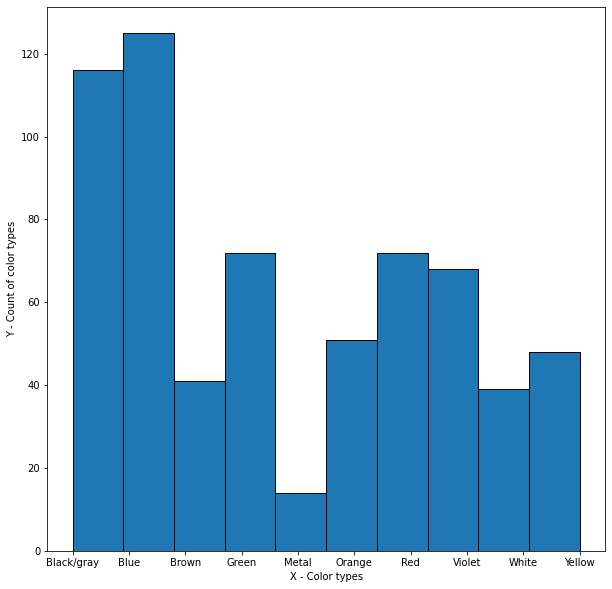

In [32]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.xlabel('X - Color types')
plt.ylabel('Y - Count of color types')
plt.hist(df['Color Type'], edgecolor = 'black')


In [33]:
classification = {
    'Black/gray' : 0,
    'Blue' : 1,
    'Brown' : 2,
    'Green' : 3,
    'Metal' : 4,
    'Orange' : 5,
    'Red' : 6,
    'Violet' : 7,
    'White' : 8,
    'Yellow' : 9
}

df = df.replace({'Color Type' : classification})

df

,Color Name,R;G;B Dec,RGB Hex,Color Type
0,Grey,84;84;84,545454,0
1,"Grey, Silver",192;192;192,C0C0C0,0
2,grey,190;190;190,BEBEBE,0
3,LightGray,211;211;211,D3D3D3,0
4,LightSlateGrey,119;136;153,778899,0
...,...,...,...,...
641,gold3,205;173;0,CDAD00,9
642,gold4,139;117;0,8B7500,9
643,Goldenrod,219;219;112,DBDB70,9
644,Medium Goldenrod,234;234;174,EAEAAE,9


In [34]:
df.groupby(['Color Type']).count()

,Color Name,R;G;B Dec,RGB Hex
Color Type,,,
0,116,116,116
1,125,125,125
2,41,41,41
3,72,72,72
4,14,14,14
5,51,51,51
6,72,72,72
7,68,68,68
8,39,39,39


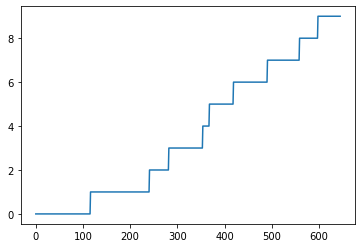

In [35]:
plt.plot(df['Color Type'])

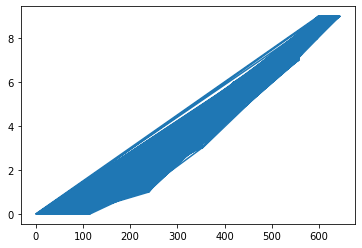

In [36]:
subdf_1 = df.sample(frac=1)
plt.plot(subdf_1['Color Type'])

In [37]:
data = df['R;G;B Dec'].str.split(';',expand=True).astype(int).values
target = df['Color Type']

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.20, shuffle=True, random_state=42)

### Results function

In [38]:
def model_results(fited_model, data_test, target_test):
    
    labels = [0,1,2,3,4,5,6,7,8,9]
    
    score = round(fited_model.score(data_test, target_test)*100, 2)
    target_pred = fited_model.predict(data_test)
    
    cf_matrix = confusion_matrix(target_test, target_pred)
    
    classification_results = classification_report(target_test.to_list(), target_pred, labels=labels)
    
    plt.figure(figsize=(15,8))
    
    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

    ax.set_title('Confusion Matrix\n\n')

    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')

    ticklabels = ['Black/gray', 'Blue', 'Brown', 'Green', 'Metal', 'Orange', 'Red',
                  'Violet', 'White', 'Yellow']
    ax.xaxis.set_ticklabels(ticklabels)
    ax.yaxis.set_ticklabels(ticklabels)
    
    print(classification_results, '\nScore obtained by the model:', score)
    
    return classification_results, score

### Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1       0.86      0.89      0.88        28
           2       0.56      0.56      0.56         9
           3       1.00      0.56      0.71        18
           4       0.00      0.00      0.00         4
           5       0.33      1.00      0.50         4
           6       0.67      0.36      0.47        11
           7       0.73      0.79      0.76        14
           8       0.17      0.67      0.27         3
           9       0.44      0.44      0.44         9

    accuracy                           0.67       130
   macro avg       0.56      0.60      0.54       130
weighted avg       0.73      0.67      0.68       130
 
Score obtained by the model: 66.92


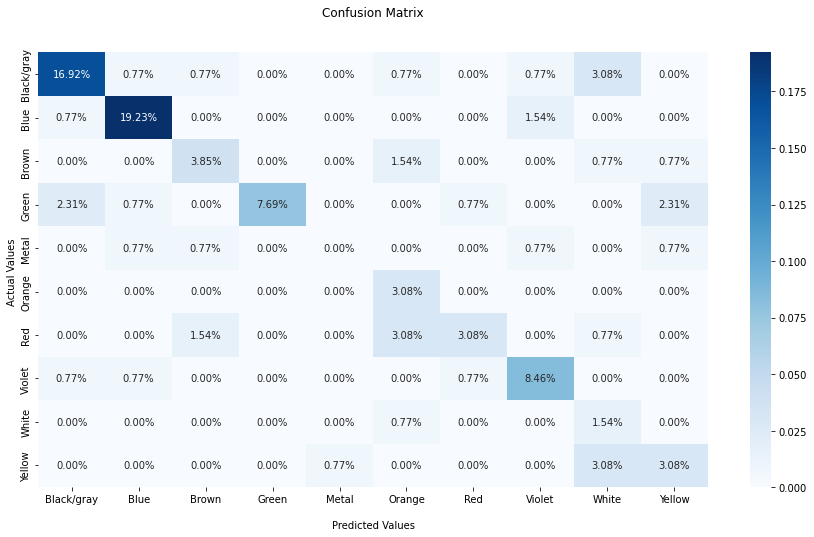

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=8, random_state=42)
gbc.fit(data_train, target_train)

GradientBoostingClassifier_results, GradientBoostingClassifier_score = model_results(gbc, data_test, target_test)

### Quadratic Discriminant Analysis

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.87      0.96      0.92        28
           2       0.25      0.11      0.15         9
           3       1.00      0.67      0.80        18
           4       0.00      0.00      0.00         4
           5       0.20      0.50      0.29         4
           6       0.64      0.64      0.64        11
           7       1.00      0.79      0.88        14
           8       0.50      1.00      0.67         3
           9       0.62      0.89      0.73         9

    accuracy                           0.77       130
   macro avg       0.60      0.65      0.60       130
weighted avg       0.78      0.77      0.76       130
 
Score obtained by the model: 76.92


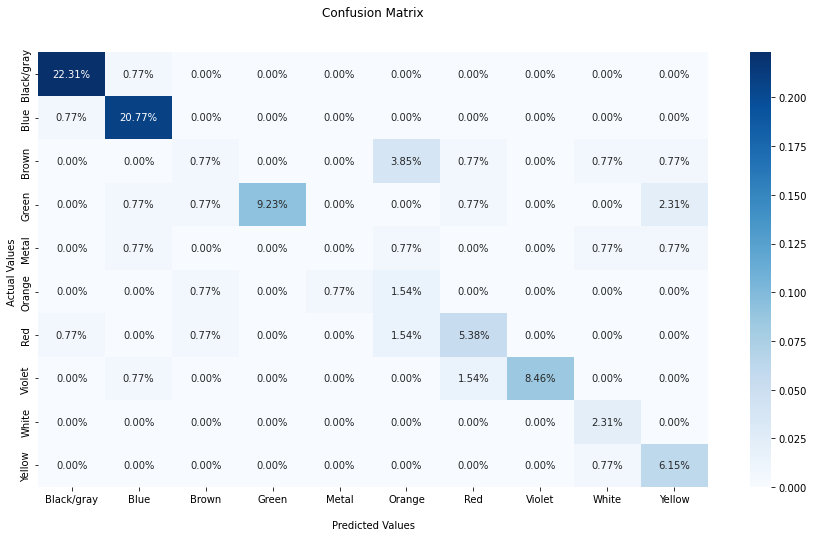

In [40]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

qda.fit(data_train, target_train)

QuadraticDiscriminantAnalysis_results, QuadraticDiscriminantAnalysis_score = model_results(qda, data_test, target_test)

### Extra Trees Classifier

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        30
           1       0.87      0.96      0.92        28
           2       0.75      0.33      0.46         9
           3       0.81      0.72      0.76        18
           4       1.00      0.25      0.40         4
           5       0.50      0.50      0.50         4
           6       0.67      0.73      0.70        11
           7       0.79      0.79      0.79        14
           8       0.20      0.67      0.31         3
           9       0.46      0.67      0.55         9

    accuracy                           0.75       130
   macro avg       0.70      0.64      0.63       130
weighted avg       0.81      0.75      0.76       130
 
Score obtained by the model: 75.38


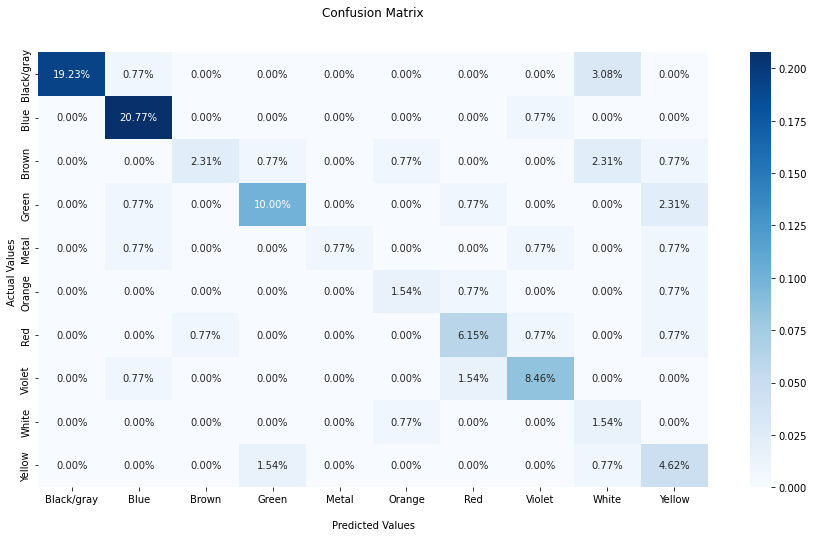

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=8, min_samples_split=4, n_jobs=-1, random_state=42)
etc.fit(data_train, target_train)

ExtraTreesClassifier_results, ExtraTreesClassifier_score = model_results(etc, data_test, target_test)

### KNeighbors Classifier

c:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

              precision    recall  f1-score   support

           0       0.67      0.87      0.75        30
           1       0.89      0.86      0.87        28
           2       0.29      0.22      0.25         9
           3       0.77      0.56      0.65        18
           4       0.50      0.25      0.33         4
           5       0.44      1.00      0.62         4
           6       0.56      0.45      0.50        11
           7       1.00      0.71      0.83        14
           8       0.14      0.33      0.20         3
           9       0.57      0.44      0.50         9

    accuracy                           0.67       130
   macro avg       0.58      0.57      0.55       130
weighted avg       0.70      0.67      0.67       130
 
Score obtained by the model: 66.92


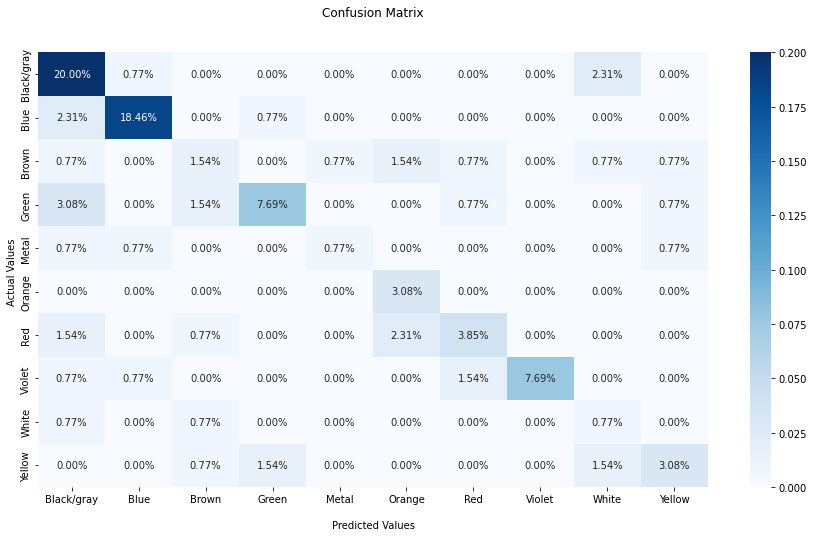

In [42]:
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=9, p=2, n_jobs=-1)

neigh.fit(data_train, target_train)


KNeighborsClassifier_results, KNeighborsClassifier_score = model_results(neigh, data_test, target_test)

### Random Forest Classifier

c:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.90      0.93      0.91        28
           2       1.00      0.44      0.62         9
           3       0.85      0.61      0.71        18
           4       0.00      0.00      0.00         4
           5       0.33      1.00      0.50         4
           6       0.62      0.45      0.53        11
           7       0.92      0.79      0.85        14
           8       0.20      0.67      0.31         3
           9       0.64      0.78      0.70         9

    accuracy                           0.73       130
   macro avg       0.63      0.65      0.59       130
weighted avg       0.78      0.73      0.73       130
 
Score obtained by the model: 73.08


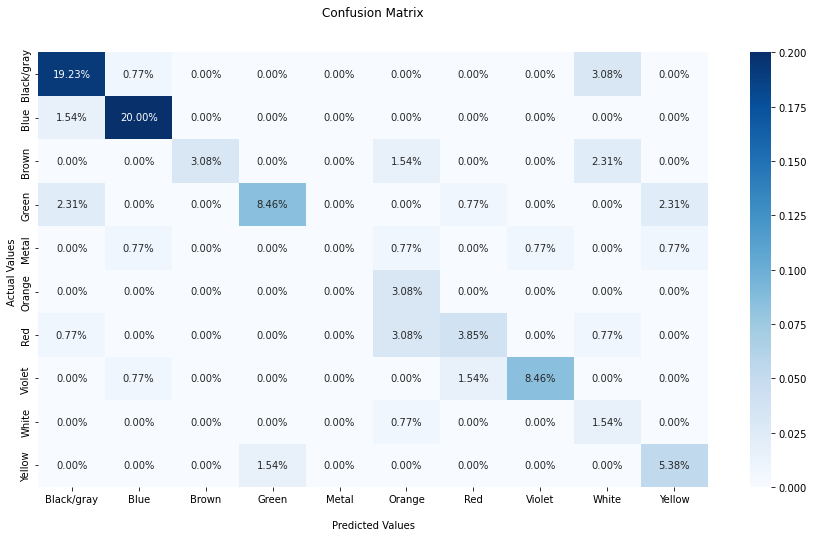

In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=45, n_jobs=-1, random_state=42,)
rfc.fit(data_train, target_train)
    
    
RandomForestClassifier_results, RandomForestClassifier_score = model_results(rfc, data_test, target_test)

### Bagging Classifier

c:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      0.87      0.84        30
           1       0.90      0.93      0.91        28
           2       0.33      0.11      0.17         9
           3       1.00      0.67      0.80        18
           4       0.00      0.00      0.00         4
           5       0.36      1.00      0.53         4
           6       0.56      0.45      0.50        11
           7       1.00      0.79      0.88        14
           8       0.23      1.00      0.38         3
           9       0.60      0.67      0.63         9

    accuracy                           0.72       130
   macro avg       0.58      0.65      0.56       130
weighted avg       0.75      0.72      0.72       130
 
Score obtained by the model: 72.31


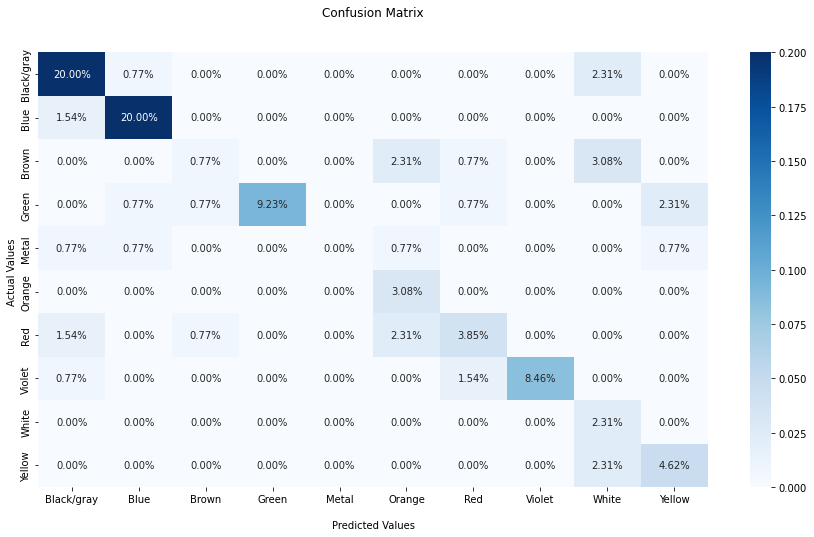

In [44]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(base_estimator=SVC(), n_estimators=5, n_jobs=-1, random_state=42)
bc.fit(data_train, target_train)

RandomForestClassifier_results, RandomForestClassifier_score = model_results(bc, data_test, target_test)

In [48]:
pickle.dump(qda, open('Models/color_classifier.sav', 'wb'))